## Load Data

In [1]:
from sklearn.model_selection import train_test_split
import datasets_util as du

#train_catalog, _ = du.get_gz2(True)
#test_catalog, _ = du.get_gz2(False)

# pick a small amount of the full dataset, splitting for train/test
full_catalog, _ = du.get_full_gz2()
small_catalog = full_catalog.iloc[:10000,:]
train_catalog, test_catalog = train_test_split(small_catalog, random_state=1)

## Preprocess Data

In [2]:
import target_formatter as tgf

# Get encodings of y data
y_encoder = tgf.get_summary_encoder(train_catalog)
y_train, y_test = tgf.get_train_test_summary_enc(y_encoder, train_catalog, test_catalog)

In [3]:
# create datasets from file paths & encoded y
train_ds = du.get_dataset(train_catalog["file_loc"], y_train, 224)
test_ds = du.get_dataset(test_catalog["file_loc"], y_test, 224)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


## Create CNN Model

In [4]:
# Import function from cnn_model.py
from cnn_model import create_cnn_model

# Define parameters
# TODO get input shape from dataset, or have parameter used here & in dataset creation
input_shape = (224, 224, 3)
# TODO dataset holds labels, can it provide the target size?
num_classes = y_train.shape[1]

# Create CNN model
model = create_cnn_model(input_shape, num_classes)

# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

## Train Model

In [5]:
# Train the model
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10,
)

Epoch 1/10
59/59 [==============================] - 80s 1s/step - loss: 1.6840 - accuracy: 0.3528 - val_loss: 1.5431 - val_accuracy: 0.3920
Epoch 2/10
59/59 [==============================] - 75s 1s/step - loss: 1.5058 - accuracy: 0.4099 - val_loss: 1.4468 - val_accuracy: 0.4536
Epoch 3/10
59/59 [==============================] - 80s 1s/step - loss: 1.3424 - accuracy: 0.4680 - val_loss: 1.2942 - val_accuracy: 0.4864
Epoch 4/10
59/59 [==============================] - 80s 1s/step - loss: 1.1757 - accuracy: 0.5437 - val_loss: 1.2782 - val_accuracy: 0.4816
Epoch 5/10
59/59 [==============================] - 78s 1s/step - loss: 1.0693 - accuracy: 0.5915 - val_loss: 1.3044 - val_accuracy: 0.4980
Epoch 6/10
59/59 [==============================] - 79s 1s/step - loss: 0.9557 - accuracy: 0.6228 - val_loss: 1.4706 - val_accuracy: 0.4700
Epoch 7/10
59/59 [==============================] - 77s 1s/step - loss: 0.8655 - accuracy: 0.6656 - val_loss: 1.5296 - val_accuracy: 0.4820
Epoch 8/10
59/59 [==

## Evaluate Model

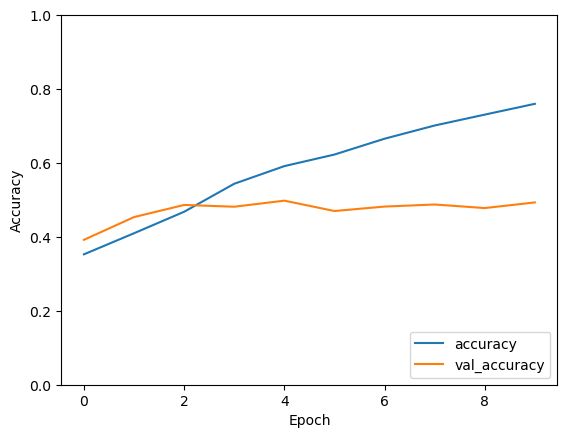

In [6]:
# Plot history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()